In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import statistics package
import scipy.stats as stats

# RICH LIST CLEANING PROCESS

In [79]:
os.chdir('/Users/alisdghnia/Desktop/School - Graduate/Advanced Database Management - Spring 2023/Final Project')

In [80]:
df = pd.read_csv('rich list.csv')
df.head()

Ticker_Symbol_name                             Ticker_Symbol_url  \
0              1 BTC  https://www.coincarp.com/currencies/bitcoin/   
1              1 BTC  https://www.coincarp.com/currencies/bitcoin/   
2              1 BTC  https://www.coincarp.com/currencies/bitcoin/   
3              1 BTC  https://www.coincarp.com/currencies/bitcoin/   
4              1 BTC  https://www.coincarp.com/currencies/bitcoin/   

                      Ticker_Symbol_top_10_list_name  \
0                 34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo   
1  bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...   
2                 3JJmF63ifcamPLiAmLgG96RA599yNtY3EQ   
3                 1LQoWist8KkaUXSPKZHNvEyfrEkPHzSsCd   
4         bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt   

  Ticker_Symbol_top_10_list_quantity Ticker_Symbol_top_10_list_Percentage  \
0                            248,597                                1.18%   
1                            178,010                                0.85%   
2                            127,351                                0.61%   
3                            119,347                                0.57%   
4                             94,643                                0.45%   

  Ticker_Symbol_top_10_list_seven_day_change  
0                                         --  
1                                    -20,000  
2                                         --  
3                                         --  
4                                         --

In [81]:
# rename column names to make it easier to work with
df = df.rename(columns = {'Ticker_Symbol_name': 'ticker', 'Ticker_Symbol_url': 'url', 'Ticker_Symbol_top_10_list_name': 'wallet_id', 'Ticker_Symbol_top_10_list_quantity': 'currency_quantity (cryptocurrency)',
                          'Ticker_Symbol_top_10_list_Percentage': 'fraction_of_total (%)', 'Ticker_Symbol_top_10_list_seven_day_change': 'seven_day_change (cryptocurrency)'})

In [82]:
df = df.dropna()

In [83]:
df = df.reset_index(drop=True)
df

ticker                                           url  \
0     1 BTC  https://www.coincarp.com/currencies/bitcoin/   
1     1 BTC  https://www.coincarp.com/currencies/bitcoin/   
2     1 BTC  https://www.coincarp.com/currencies/bitcoin/   
3     1 BTC  https://www.coincarp.com/currencies/bitcoin/   
4     1 BTC  https://www.coincarp.com/currencies/bitcoin/   
...     ...                                           ...   
1395  6 XRP   https://www.coincarp.com/currencies/ripple/   
1396  6 XRP   https://www.coincarp.com/currencies/ripple/   
1397  6 XRP   https://www.coincarp.com/currencies/ripple/   
1398  6 XRP   https://www.coincarp.com/currencies/ripple/   
1399  6 XRP   https://www.coincarp.com/currencies/ripple/   

                                              wallet_id  \
0                    34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo   
1     bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...   
2                    3JJmF63ifcamPLiAmLgG96RA599yNtY3EQ   
3                    1LQoWist8KkaUXSPKZHNvEyfrEkPHzSsCd   
4            bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt   
...                                                 ...   
1395                 rU1bPM4q2rVhC73F7znm7Lt5QnYzZsV35q   
1396                 rhVcN6Vh8VbwNsuvRN6dXZhbL7TvWtjhpH   
1397                 rUYkx2mGm1m4wH75cgedu79vshbfDFUWj8   
1398                 r3rVXDv8HDUBcrckfda9YsnBkX2E62WLyK   
1399                 rHU6iE3RcZTWvSAkQuFdYVFjRHWtsFNRk7   

     currency_quantity (cryptocurrency) fraction_of_total (%)  \
0                               248,597                 1.18%   
1                               178,010                 0.85%   
2                               127,351                 0.61%   
3                               119,347                 0.57%   
4                                94,643                 0.45%   
...                                 ...                   ...   
1395                         72,844,793                 0.07%   
1396                         71,849,887                 0.07%   
1397                         70,894,904                 0.07%   
1398                         70,000,012                 0.07%   
1399                         69,723,518                 0.07%   

     seven_day_change (cryptocurrency)  
0                                   --  
1                              -20,000  
2                                   --  
3                                   --  
4                                   --  
...                                ...  
1395                                --  
1396                                --  
1397                                --  
1398                                --  
1399                                --  

[1400 rows x 6 columns]

In [84]:
# rename 1 ETH to 2 ETH
df.ticker = df.ticker.replace('1 ETH', '2 ETH')

In [85]:
df.ticker.value_counts()

1 BTC      100
3 USDT     100
4 BNB      100
5 USDC     100
7 ADA      100
8 MATIC    100
9 DOGE     100
10 OKB     100
12 SOL     100
13 BUSD    100
14 LTC     100
15 DAI     100
2 ETH      100
6 XRP      100
Name: ticker, dtype: int64

In [86]:
# separate number and ticker in the ticker column
df['rank'] = df.ticker.str.split(' ').str[0]
df['ticker'] = df.ticker.str.split(' ').str[1]

In [87]:
# bring rank column to the front
df = df[['rank', 'ticker', 'url', 'wallet_id', 'currency_quantity (cryptocurrency)', 'fraction_of_total (%)', 'seven_day_change (cryptocurrency)']]
df

rank ticker                                           url  \
0       1    BTC  https://www.coincarp.com/currencies/bitcoin/   
1       1    BTC  https://www.coincarp.com/currencies/bitcoin/   
2       1    BTC  https://www.coincarp.com/currencies/bitcoin/   
3       1    BTC  https://www.coincarp.com/currencies/bitcoin/   
4       1    BTC  https://www.coincarp.com/currencies/bitcoin/   
...   ...    ...                                           ...   
1395    6    XRP   https://www.coincarp.com/currencies/ripple/   
1396    6    XRP   https://www.coincarp.com/currencies/ripple/   
1397    6    XRP   https://www.coincarp.com/currencies/ripple/   
1398    6    XRP   https://www.coincarp.com/currencies/ripple/   
1399    6    XRP   https://www.coincarp.com/currencies/ripple/   

                                              wallet_id  \
0                    34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo   
1     bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...   
2                    3JJmF63ifcamPLiAmLgG96RA599yNtY3EQ   
3                    1LQoWist8KkaUXSPKZHNvEyfrEkPHzSsCd   
4            bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt   
...                                                 ...   
1395                 rU1bPM4q2rVhC73F7znm7Lt5QnYzZsV35q   
1396                 rhVcN6Vh8VbwNsuvRN6dXZhbL7TvWtjhpH   
1397                 rUYkx2mGm1m4wH75cgedu79vshbfDFUWj8   
1398                 r3rVXDv8HDUBcrckfda9YsnBkX2E62WLyK   
1399                 rHU6iE3RcZTWvSAkQuFdYVFjRHWtsFNRk7   

     currency_quantity (cryptocurrency) fraction_of_total (%)  \
0                               248,597                 1.18%   
1                               178,010                 0.85%   
2                               127,351                 0.61%   
3                               119,347                 0.57%   
4                                94,643                 0.45%   
...                                 ...                   ...   
1395                         72,844,793                 0.07%   
1396                         71,849,887                 0.07%   
1397                         70,894,904                 0.07%   
1398                         70,000,012                 0.07%   
1399                         69,723,518                 0.07%   

     seven_day_change (cryptocurrency)  
0                                   --  
1                              -20,000  
2                                   --  
3                                   --  
4                                   --  
...                                ...  
1395                                --  
1396                                --  
1397                                --  
1398                                --  
1399                                --  

[1400 rows x 7 columns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   rank                                1400 non-null   object
 1   ticker                              1400 non-null   object
 2   url                                 1400 non-null   object
 3   wallet_id                           1400 non-null   object
 4   currency_quantity (cryptocurrency)  1400 non-null   object
 5   fraction_of_total (%)               1400 non-null   object
 6   seven_day_change (cryptocurrency)   1400 non-null   object
dtypes: object(7)
memory usage: 76.7+ KB


In [89]:
# convert currency_quantity to float
df['currency_quantity (cryptocurrency)'] = df['currency_quantity (cryptocurrency)'].str.replace(',', '')
df['currency_quantity (cryptocurrency)'] = df['currency_quantity (cryptocurrency)'].astype(float)

# convert fraction_of_total to float
df['fraction_of_total (%)'] = df['fraction_of_total (%)'].str.replace('%', '')
df['fraction_of_total (%)'] = df['fraction_of_total (%)'].astype(float)

# convert rank to integer
df['rank'] = df['rank'].astype(int)

In [90]:
# order by rank then currency quantity
df = df.sort_values(by=['rank', 'currency_quantity (cryptocurrency)'], ascending=[True, False])
df

rank ticker                                           url  \
0        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
1        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
2        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
3        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
4        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
...    ...    ...                                           ...   
1195    15    DAI      https://www.coincarp.com/currencies/dai/   
1196    15    DAI      https://www.coincarp.com/currencies/dai/   
1197    15    DAI      https://www.coincarp.com/currencies/dai/   
1198    15    DAI      https://www.coincarp.com/currencies/dai/   
1199    15    DAI      https://www.coincarp.com/currencies/dai/   

                                              wallet_id  \
0                    34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo   
1     bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...   
2                    3JJmF63ifcamPLiAmLgG96RA599yNtY3EQ   
3                    1LQoWist8KkaUXSPKZHNvEyfrEkPHzSsCd   
4            bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt   
...                                                 ...   
1195         0xc1f8fe4afed59e461cbea887c3a578076ffb707f   
1196         0xb5714084eef0f02efdd145dfb3fe2e3290591d7b   
1197         0x7b052756f8cb2fdcd9de2f1665d0d6648317346a   
1198         0xcf2c181e33c5e9f72928c1e8975ff4a9bfe77e32   
1199         0x3178aa92bf66355664c92684f1dcfe1857a873a3   

      currency_quantity (cryptocurrency)  fraction_of_total (%)  \
0                               248597.0                   1.18   
1                               178010.0                   0.85   
2                               127351.0                   0.61   
3                               119347.0                   0.57   
4                                94643.0                   0.45   
...                                  ...                    ...   
1195                             83585.0                   0.06   
1196                             81127.0                   0.05   
1197                             80383.0                   0.05   
1198                             79464.0                   0.05   
1199                             78595.0                   0.05   

     seven_day_change (cryptocurrency)  
0                                   --  
1                              -20,000  
2                                   --  
3                                   --  
4                                   --  
...                                ...  
1195                                --  
1196                                --  
1197                           -21,110  
1198                               -10  
1199                                --  

[1400 rows x 7 columns]

In [91]:
df.reset_index(drop=True, inplace=True)
df

rank ticker                                           url  \
0        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
1        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
2        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
3        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
4        1    BTC  https://www.coincarp.com/currencies/bitcoin/   
...    ...    ...                                           ...   
1395    15    DAI      https://www.coincarp.com/currencies/dai/   
1396    15    DAI      https://www.coincarp.com/currencies/dai/   
1397    15    DAI      https://www.coincarp.com/currencies/dai/   
1398    15    DAI      https://www.coincarp.com/currencies/dai/   
1399    15    DAI      https://www.coincarp.com/currencies/dai/   

                                              wallet_id  \
0                    34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo   
1     bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...   
2                    3JJmF63ifcamPLiAmLgG96RA599yNtY3EQ   
3                    1LQoWist8KkaUXSPKZHNvEyfrEkPHzSsCd   
4            bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt   
...                                                 ...   
1395         0xc1f8fe4afed59e461cbea887c3a578076ffb707f   
1396         0xb5714084eef0f02efdd145dfb3fe2e3290591d7b   
1397         0x7b052756f8cb2fdcd9de2f1665d0d6648317346a   
1398         0xcf2c181e33c5e9f72928c1e8975ff4a9bfe77e32   
1399         0x3178aa92bf66355664c92684f1dcfe1857a873a3   

      currency_quantity (cryptocurrency)  fraction_of_total (%)  \
0                               248597.0                   1.18   
1                               178010.0                   0.85   
2                               127351.0                   0.61   
3                               119347.0                   0.57   
4                                94643.0                   0.45   
...                                  ...                    ...   
1395                             83585.0                   0.06   
1396                             81127.0                   0.05   
1397                             80383.0                   0.05   
1398                             79464.0                   0.05   
1399                             78595.0                   0.05   

     seven_day_change (cryptocurrency)  
0                                   --  
1                              -20,000  
2                                   --  
3                                   --  
4                                   --  
...                                ...  
1395                                --  
1396                                --  
1397                           -21,110  
1398                               -10  
1399                                --  

[1400 rows x 7 columns]

In [92]:
# drop , from seven_day_change and convert to float
df['seven_day_change (cryptocurrency)'] = df['seven_day_change (cryptocurrency)'].str.replace(',', '')
df['seven_day_change (cryptocurrency)'] = df['seven_day_change (cryptocurrency)'].str.replace('--', '')

# change empty values to 0
df['seven_day_change (cryptocurrency)'] = df['seven_day_change (cryptocurrency)'].replace('', 0)

df['seven_day_change (cryptocurrency)'] = df['seven_day_change (cryptocurrency)'].fillna(0)
df['seven_day_change (cryptocurrency)'] = df['seven_day_change (cryptocurrency)'].astype(float)

# drop url column
df = df.drop(columns=['url'])

df

rank ticker                                          wallet_id  \
0        1    BTC                 34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseo   
1        1    BTC  bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...   
2        1    BTC                 3JJmF63ifcamPLiAmLgG96RA599yNtY3EQ   
3        1    BTC                 1LQoWist8KkaUXSPKZHNvEyfrEkPHzSsCd   
4        1    BTC         bc1qazcm763858nkj2dj986etajv6wquslv8uxwczt   
...    ...    ...                                                ...   
1395    15    DAI         0xc1f8fe4afed59e461cbea887c3a578076ffb707f   
1396    15    DAI         0xb5714084eef0f02efdd145dfb3fe2e3290591d7b   
1397    15    DAI         0x7b052756f8cb2fdcd9de2f1665d0d6648317346a   
1398    15    DAI         0xcf2c181e33c5e9f72928c1e8975ff4a9bfe77e32   
1399    15    DAI         0x3178aa92bf66355664c92684f1dcfe1857a873a3   

      currency_quantity (cryptocurrency)  fraction_of_total (%)  \
0                               248597.0                   1.18   
1                               178010.0                   0.85   
2                               127351.0                   0.61   
3                               119347.0                   0.57   
4                                94643.0                   0.45   
...                                  ...                    ...   
1395                             83585.0                   0.06   
1396                             81127.0                   0.05   
1397                             80383.0                   0.05   
1398                             79464.0                   0.05   
1399                             78595.0                   0.05   

      seven_day_change (cryptocurrency)  
0                                   0.0  
1                              -20000.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
...                                 ...  
1395                                0.0  
1396                                0.0  
1397                           -21110.0  
1398                              -10.0  
1399                                0.0  

[1400 rows x 6 columns]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rank                                1400 non-null   int64  
 1   ticker                              1400 non-null   object 
 2   wallet_id                           1400 non-null   object 
 3   currency_quantity (cryptocurrency)  1400 non-null   float64
 4   fraction_of_total (%)               1400 non-null   float64
 5   seven_day_change (cryptocurrency)   1400 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 65.8+ KB


In [94]:
df.to_csv('rich list clean.csv', index=False)

# RICH LIST STATS

In [ ]:
# for each ticker, create a barplot of the currency quantity
for ticker in df.ticker.unique():
    df[df.ticker == ticker].plot.bar(x='wallet_id', y='currency_quantity', figsize=(20, 10))
    plt.title(ticker)
    plt.show()

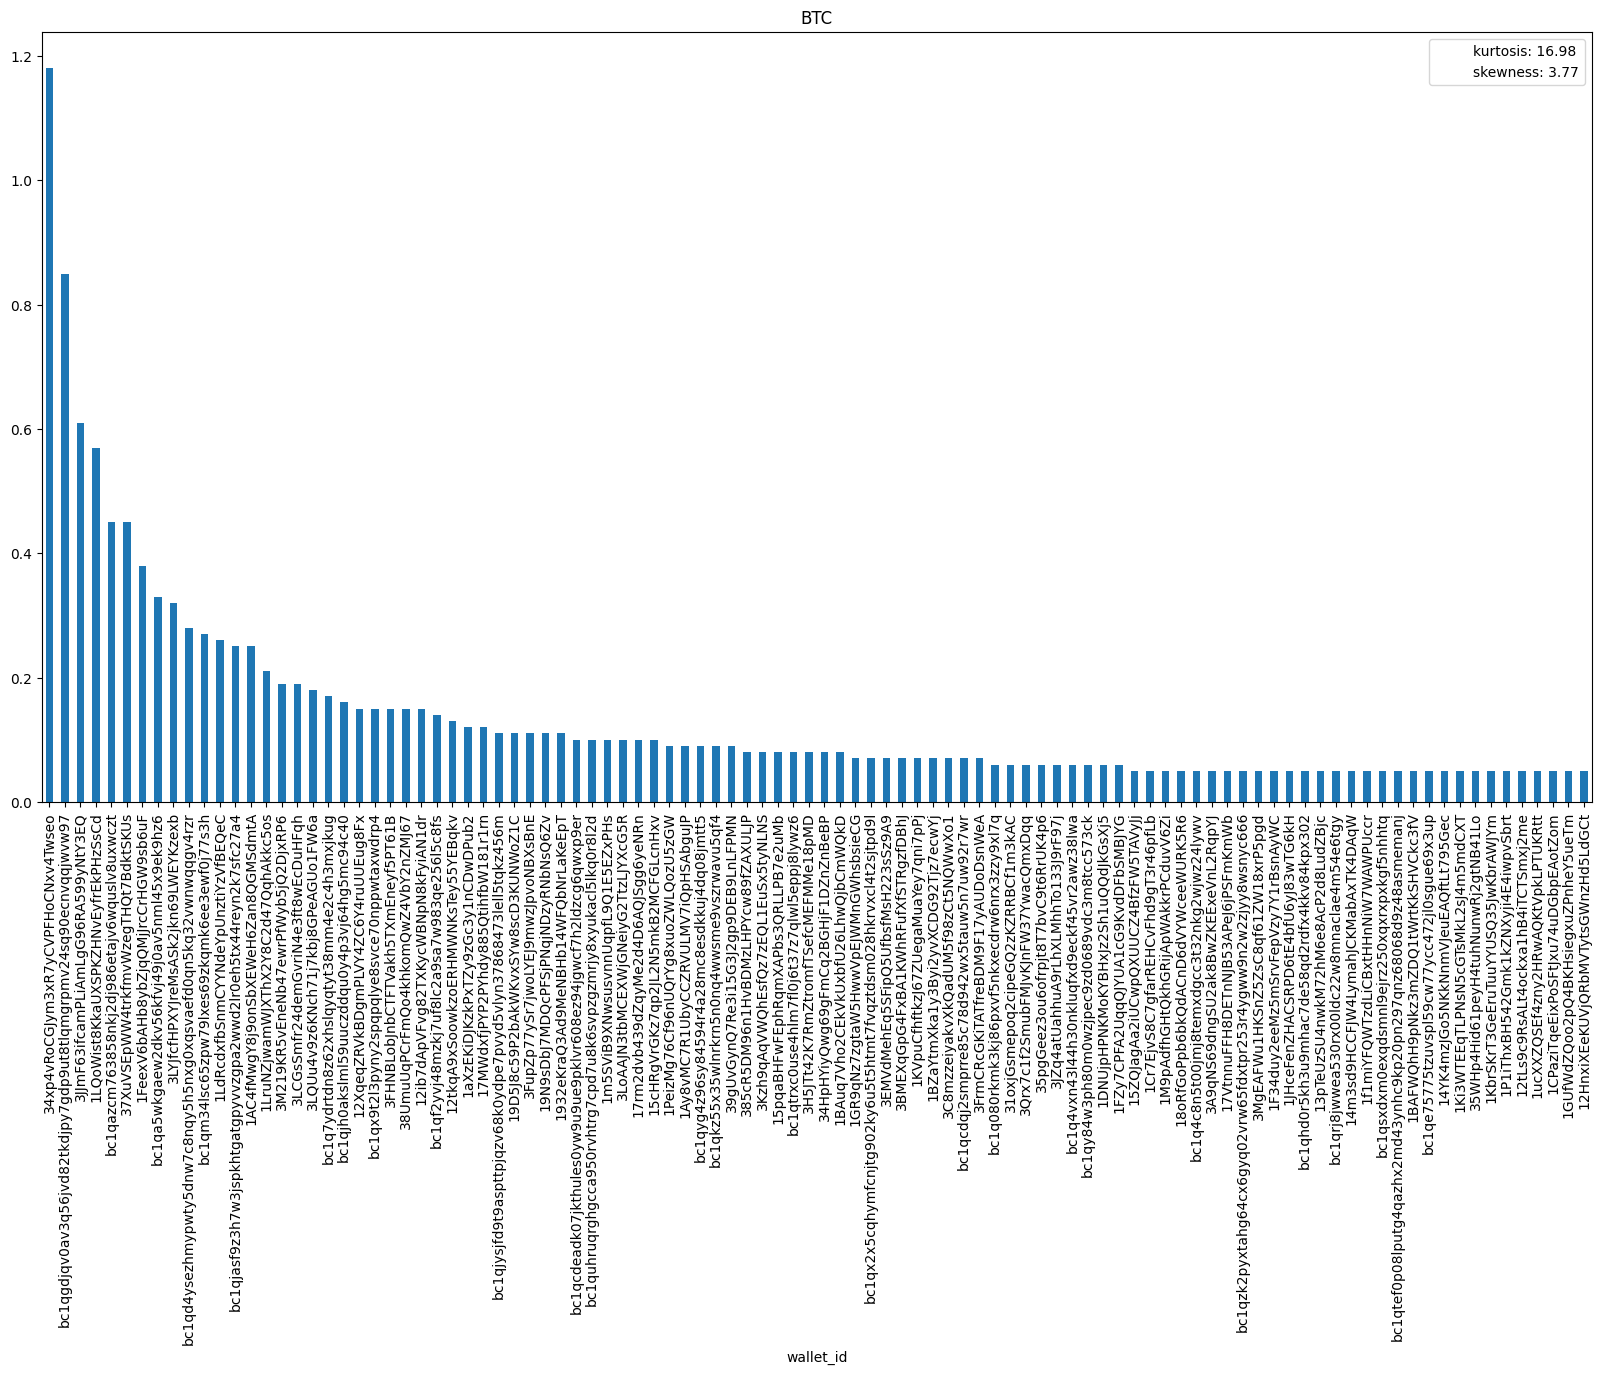

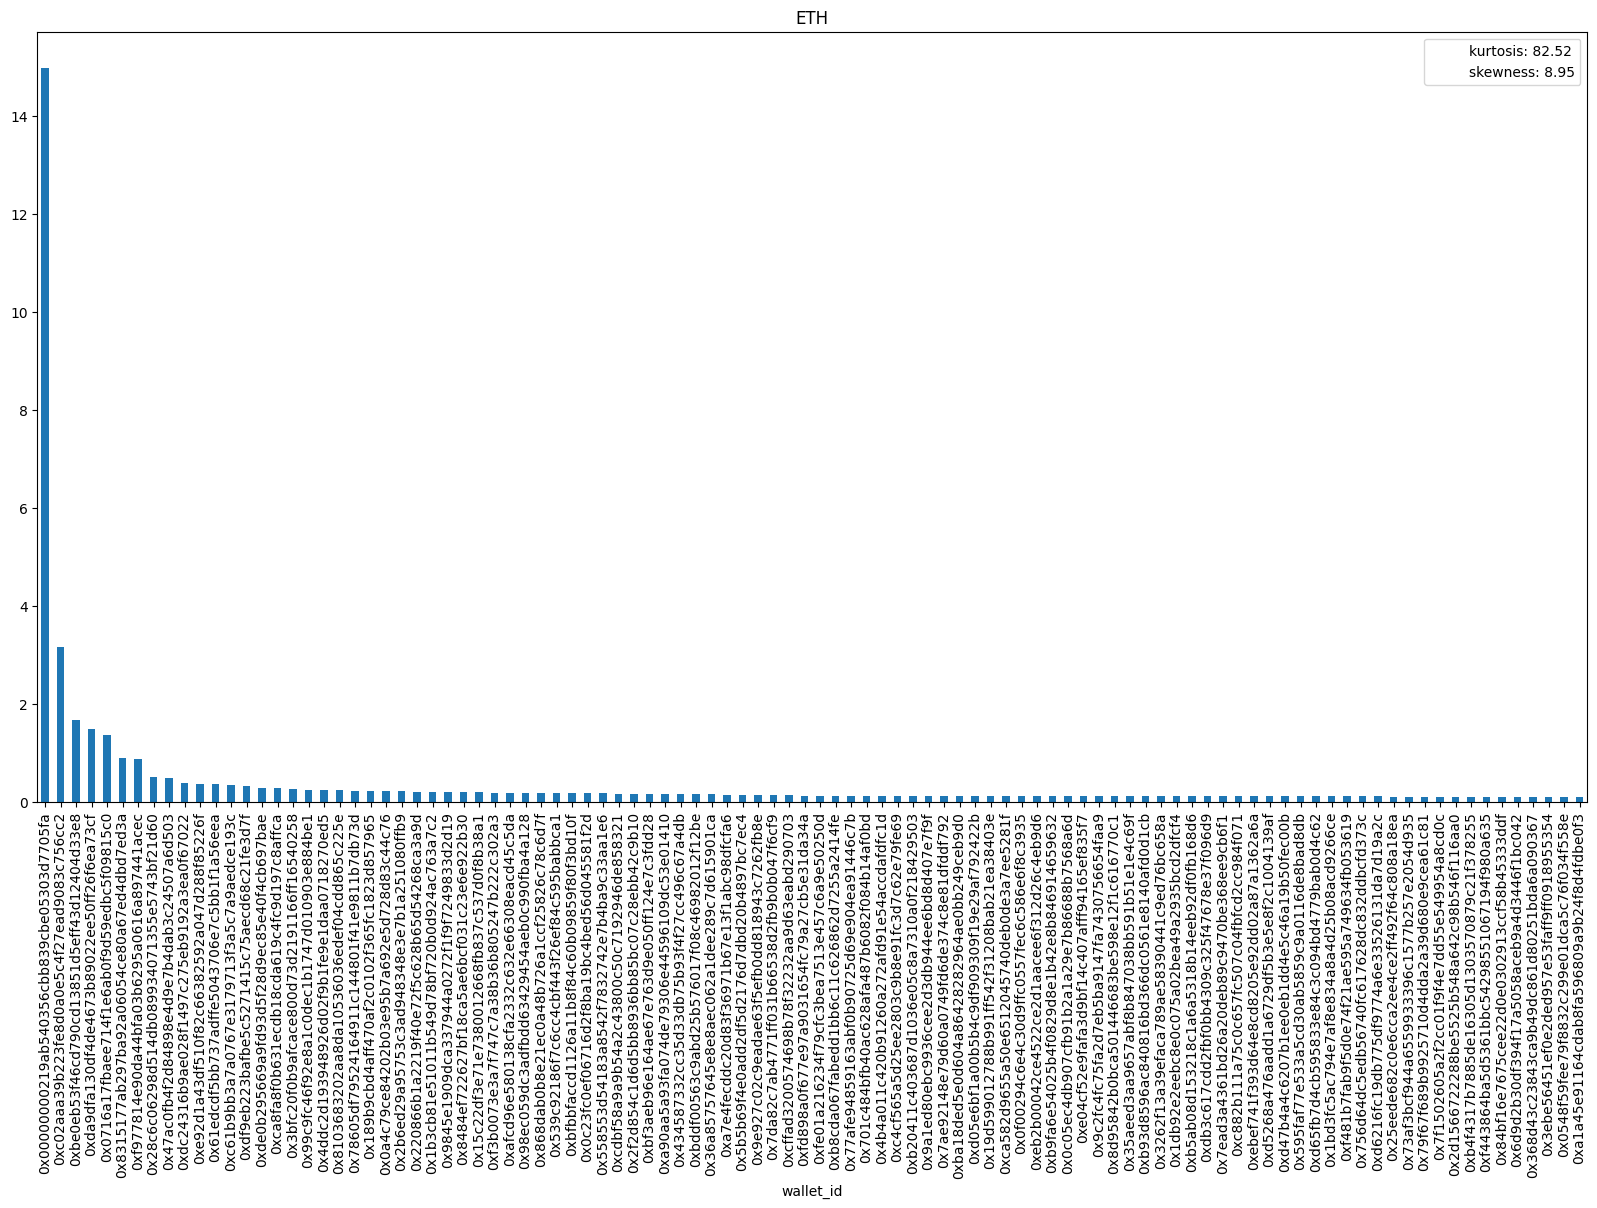

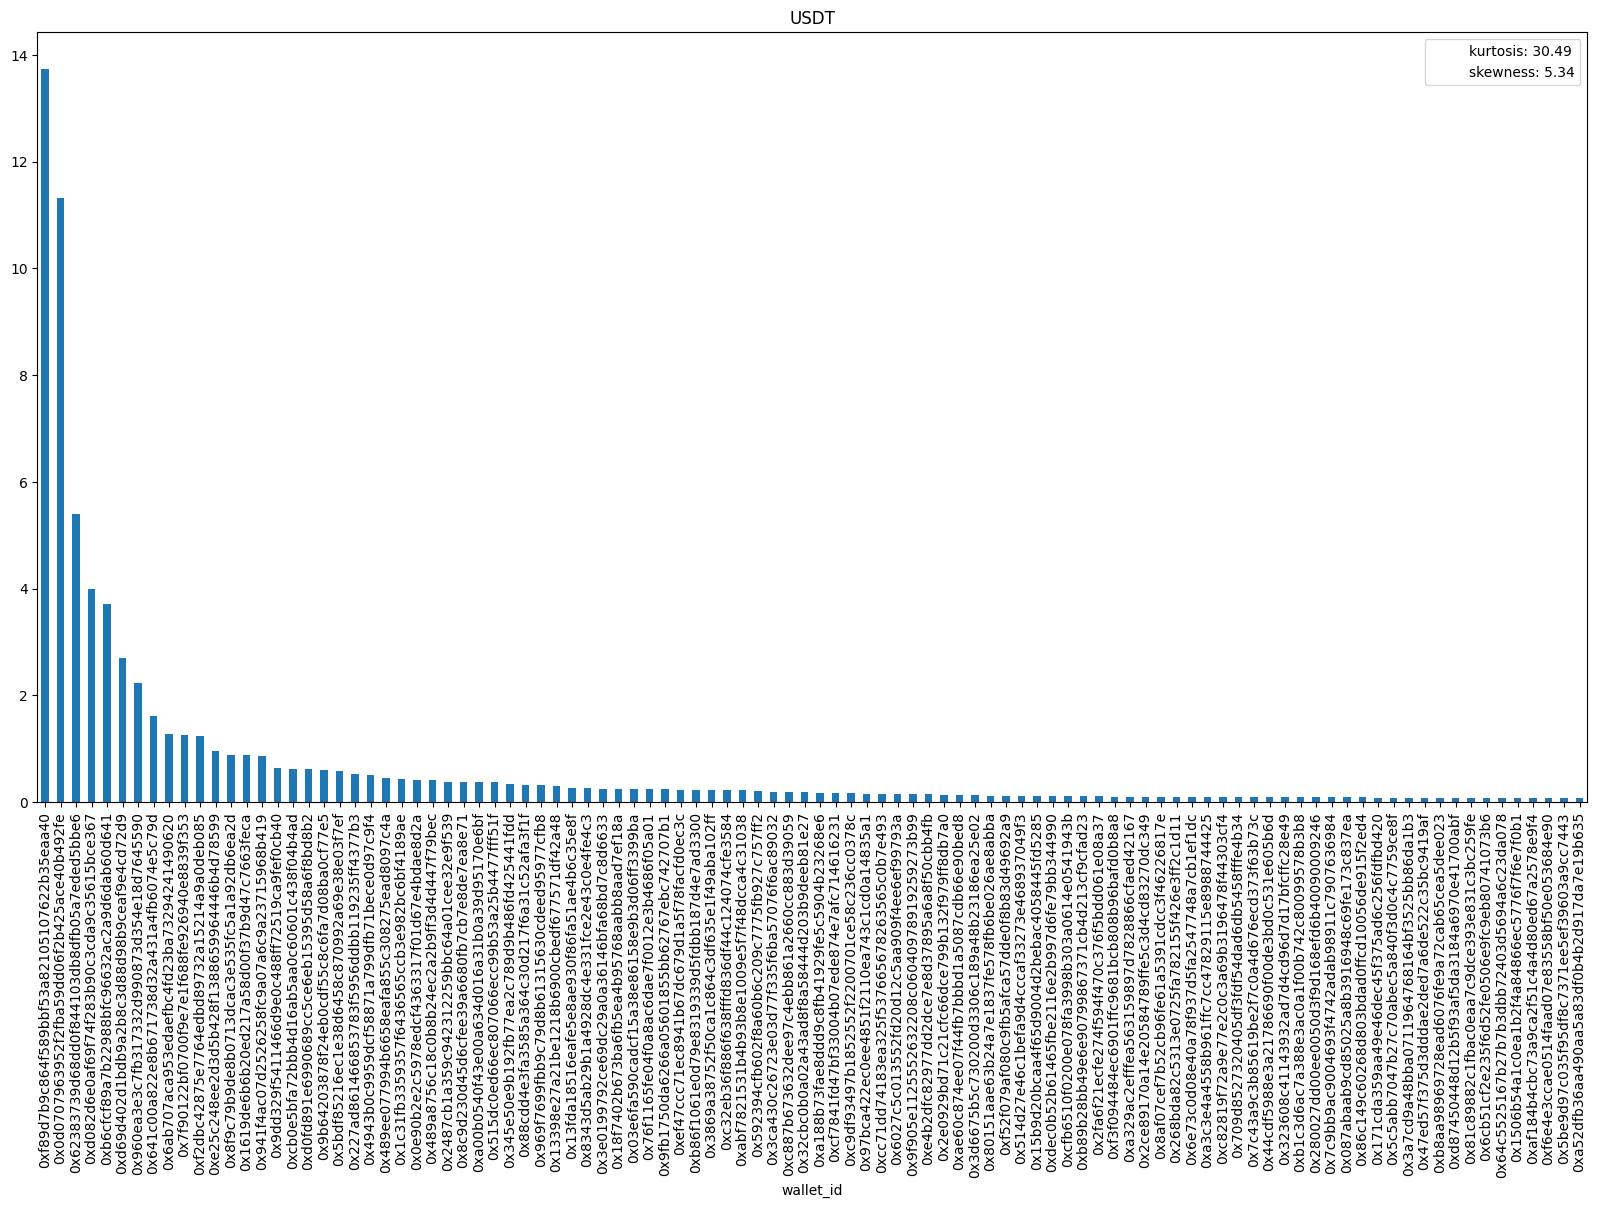

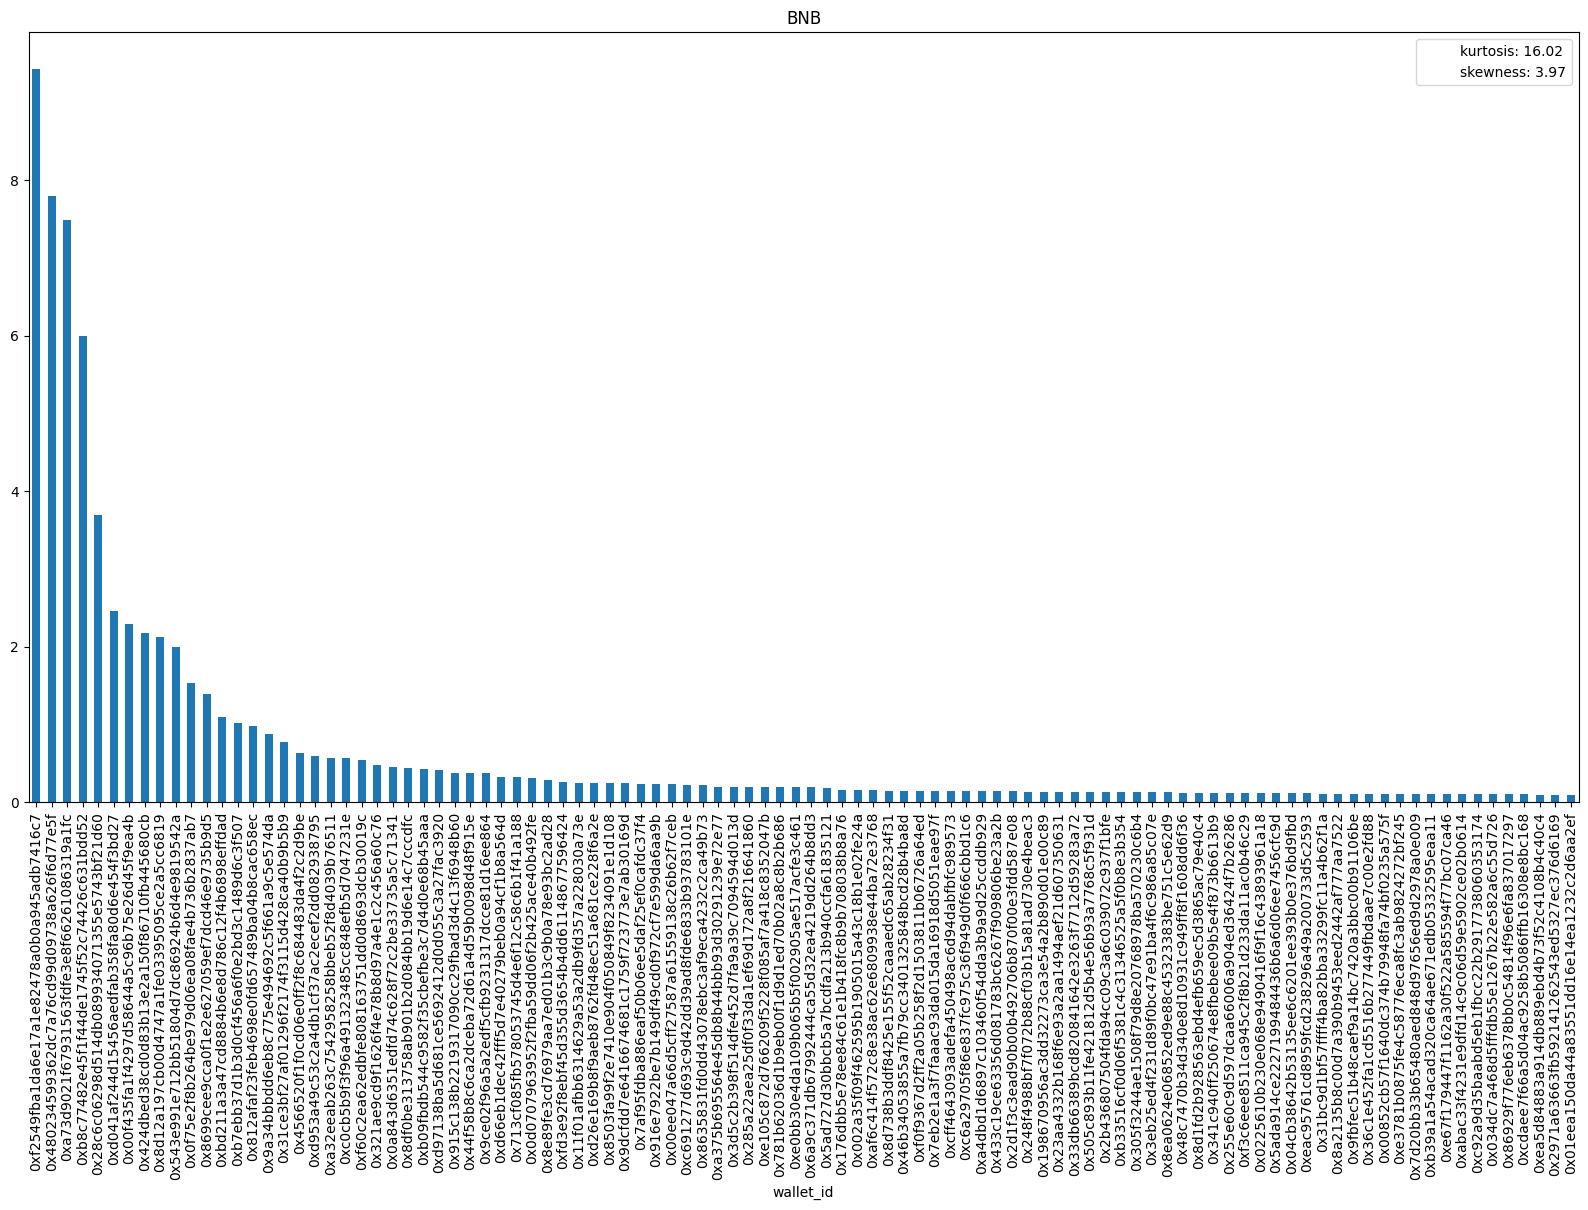

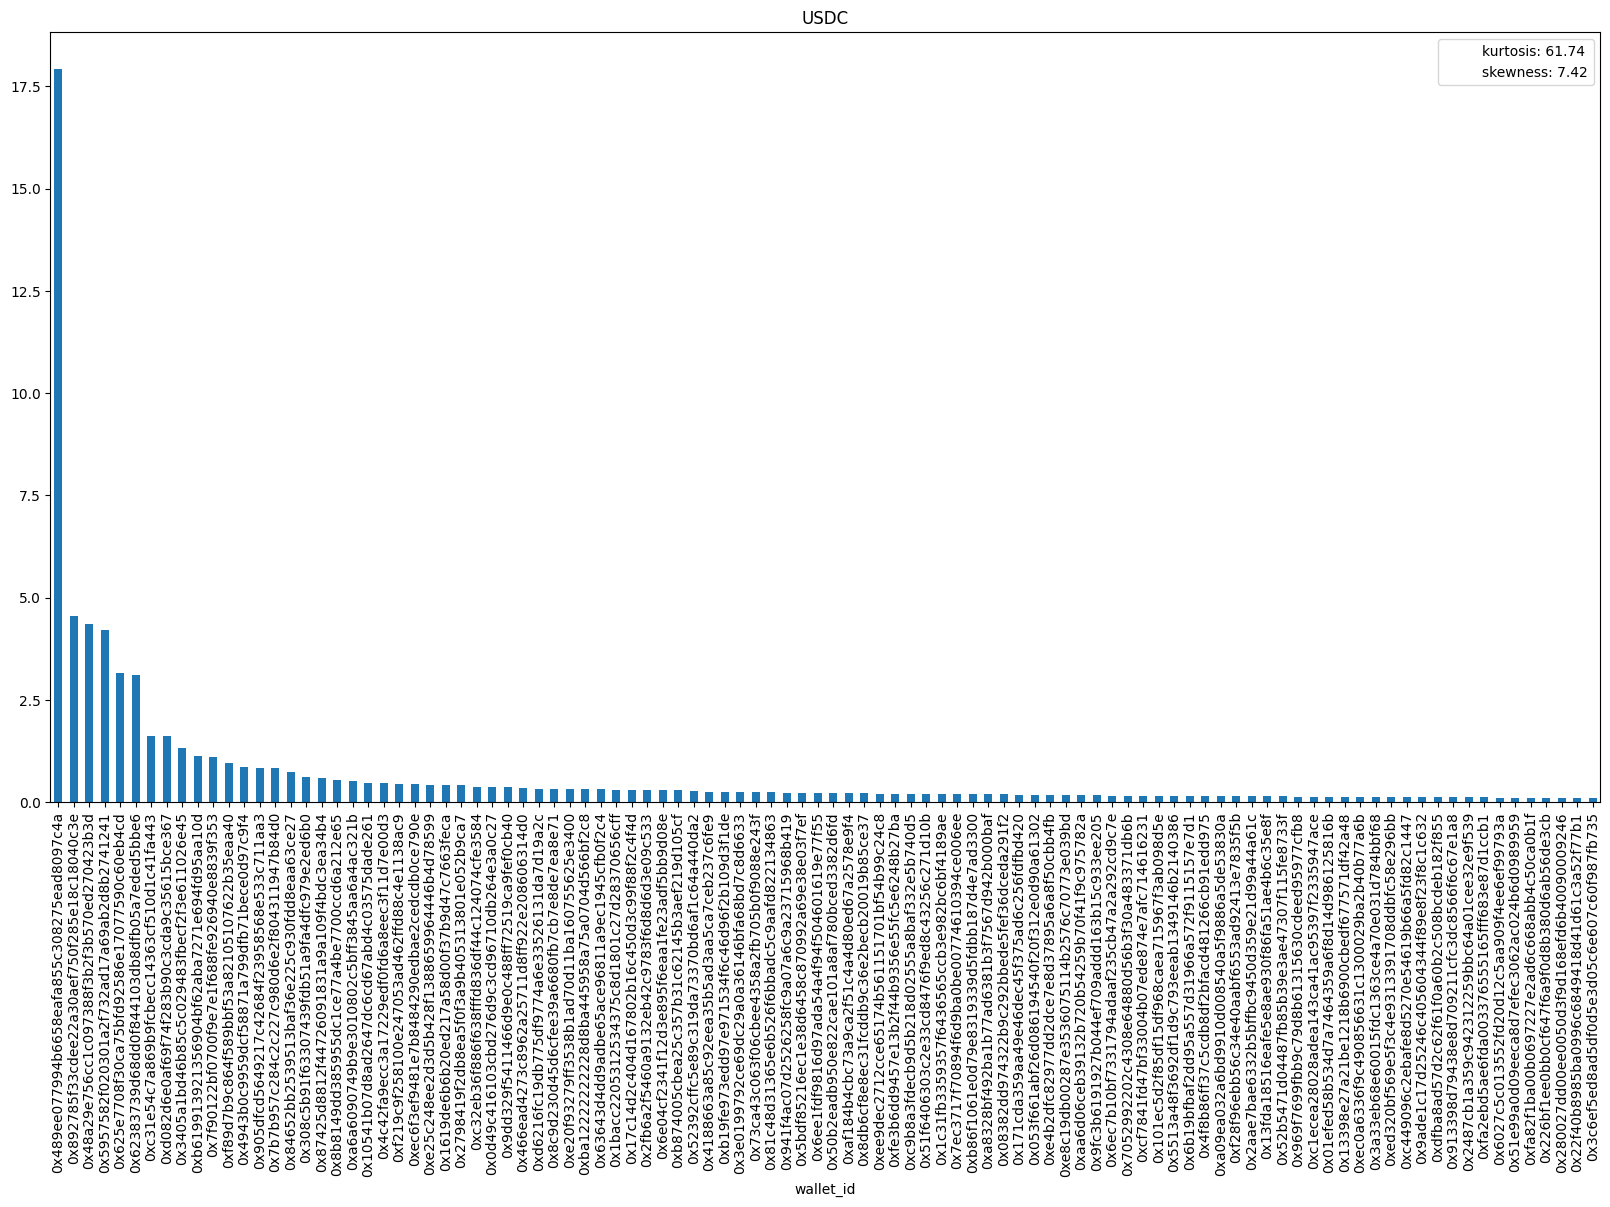

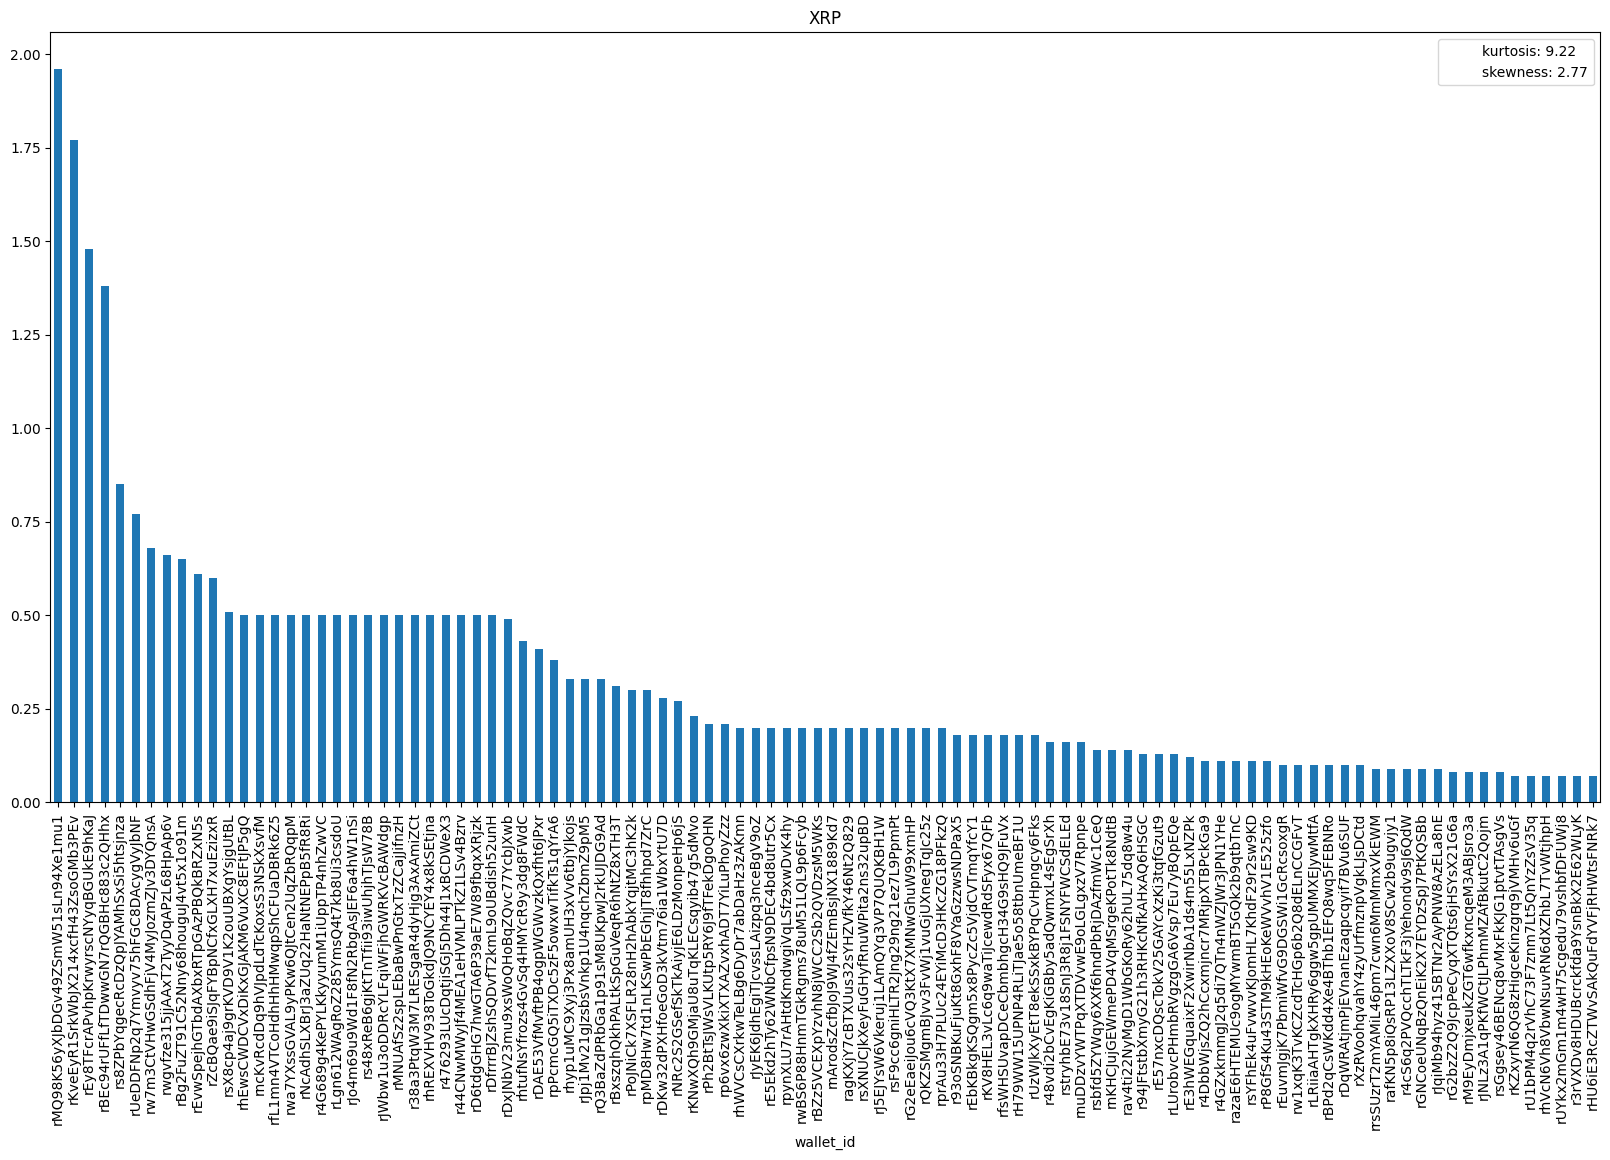

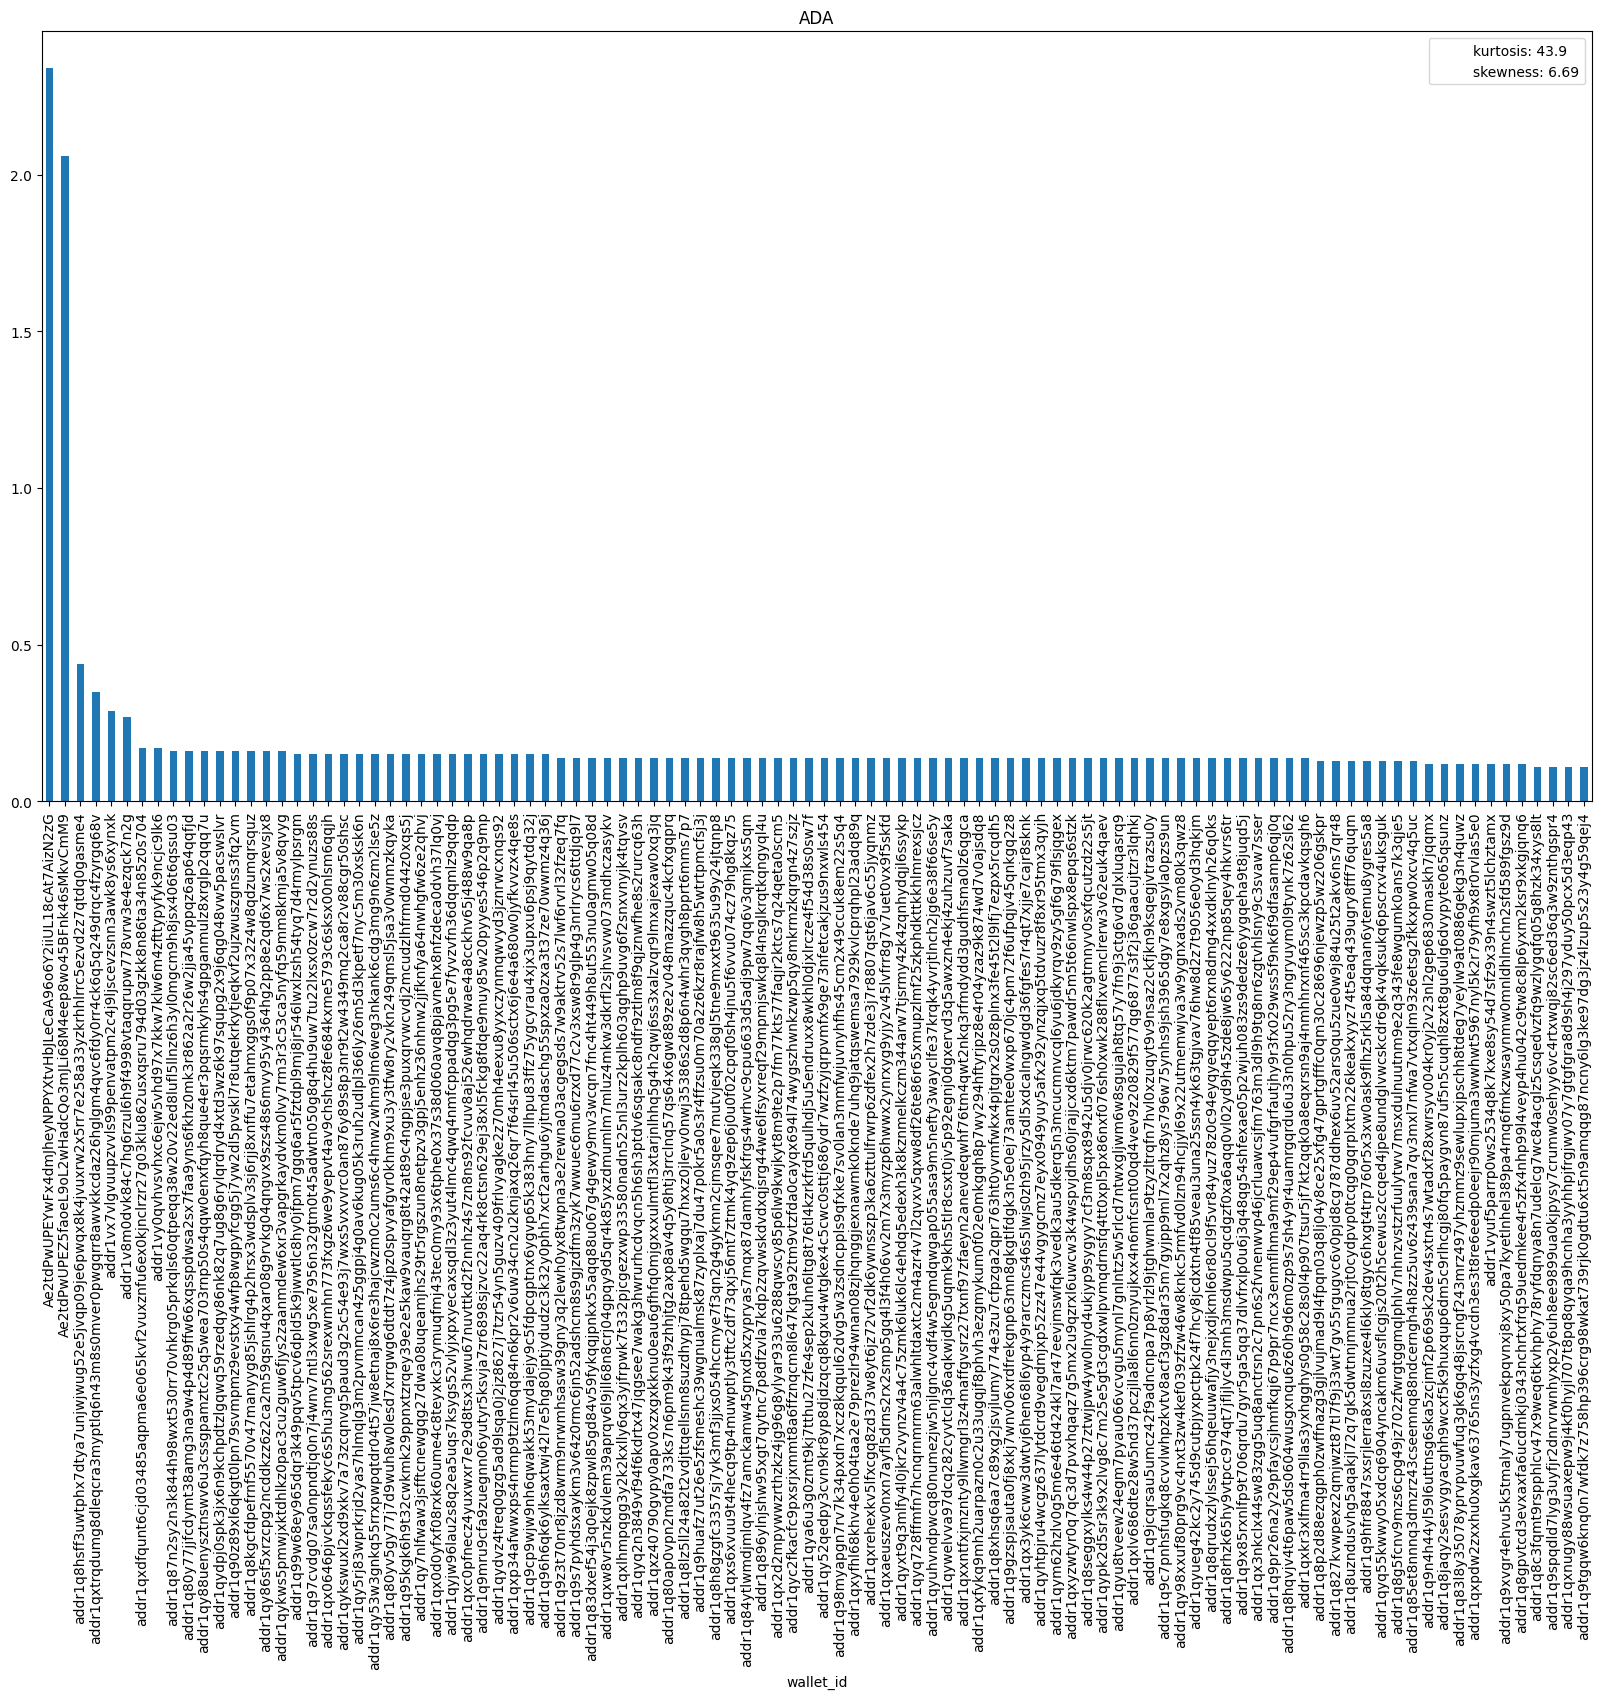

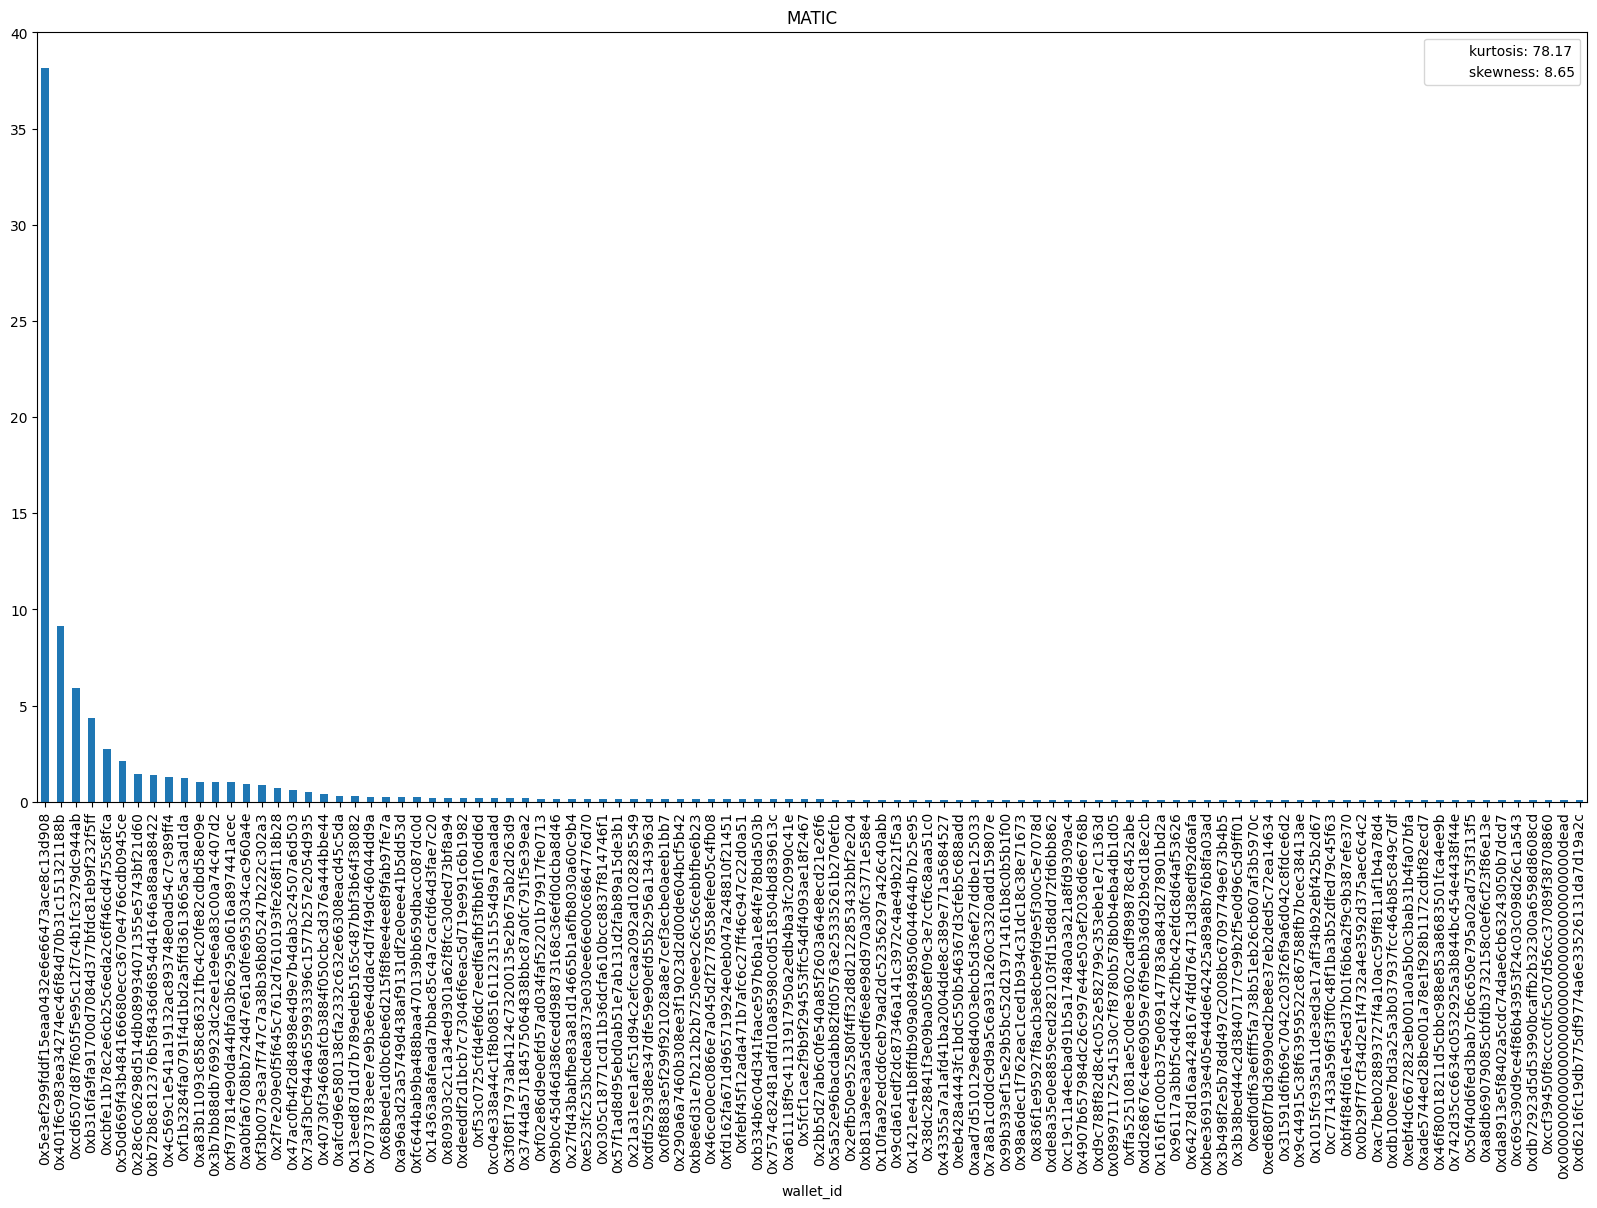

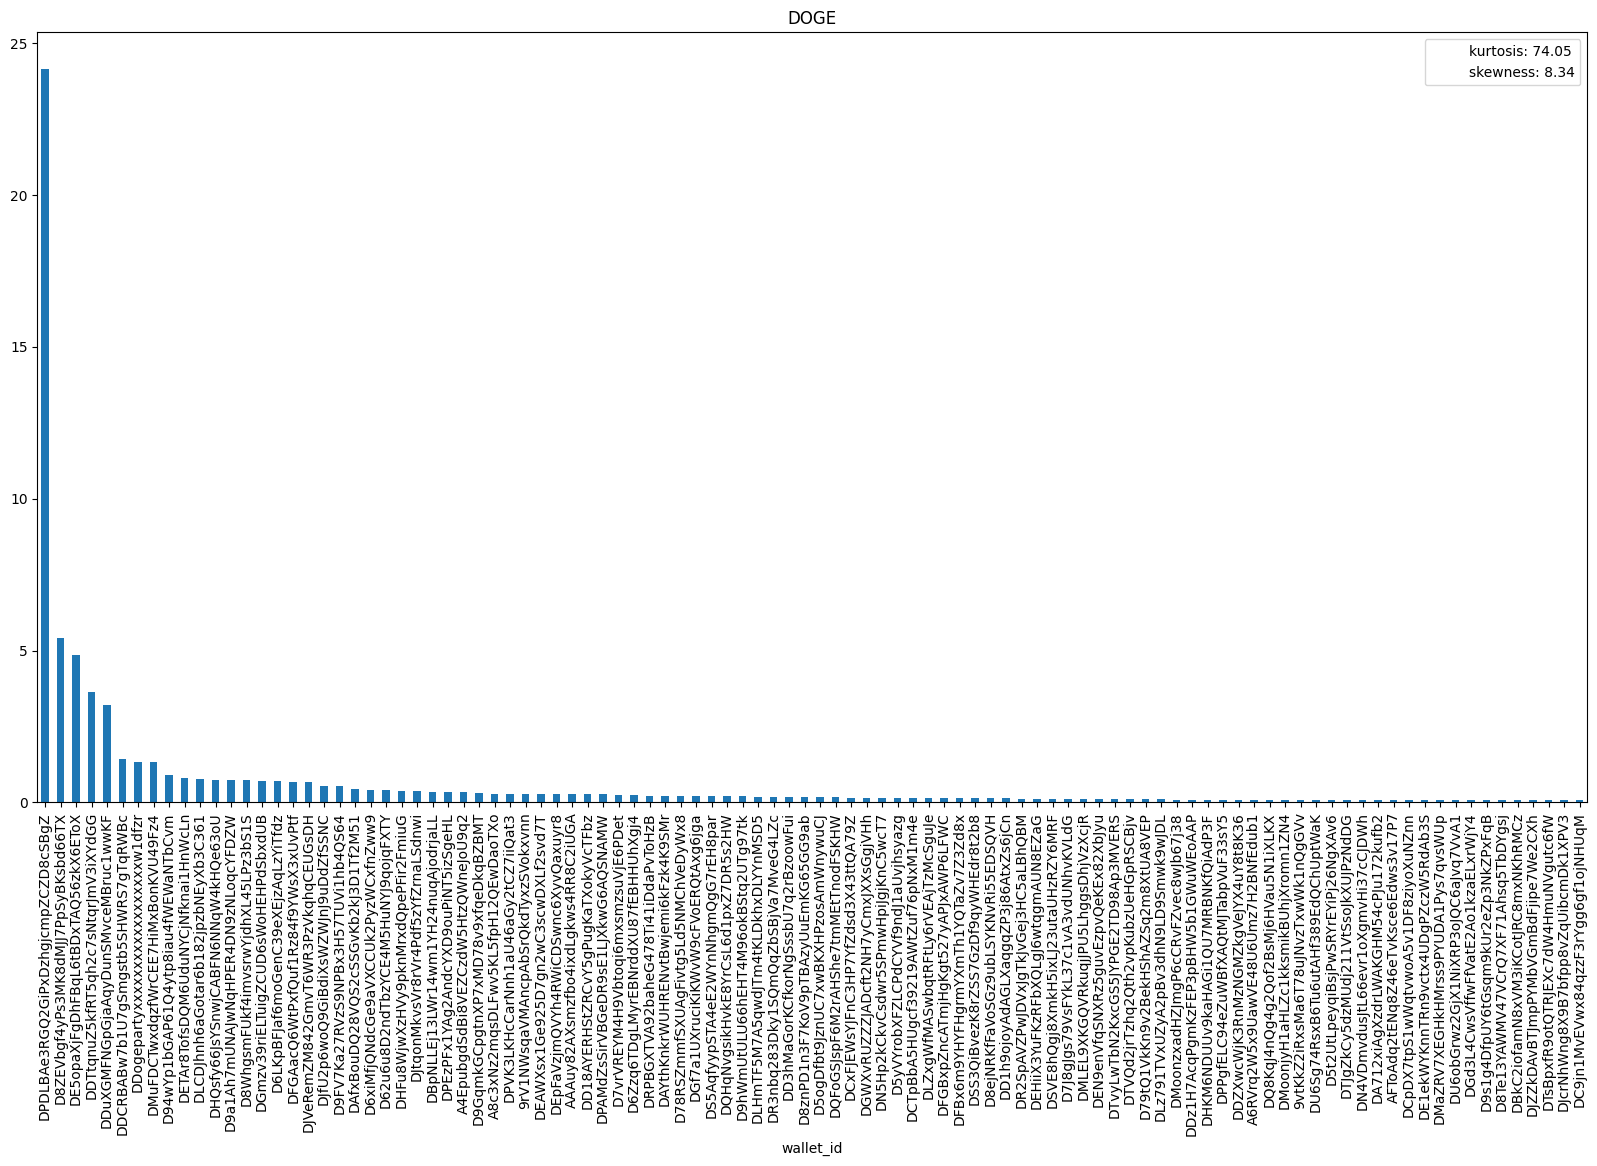

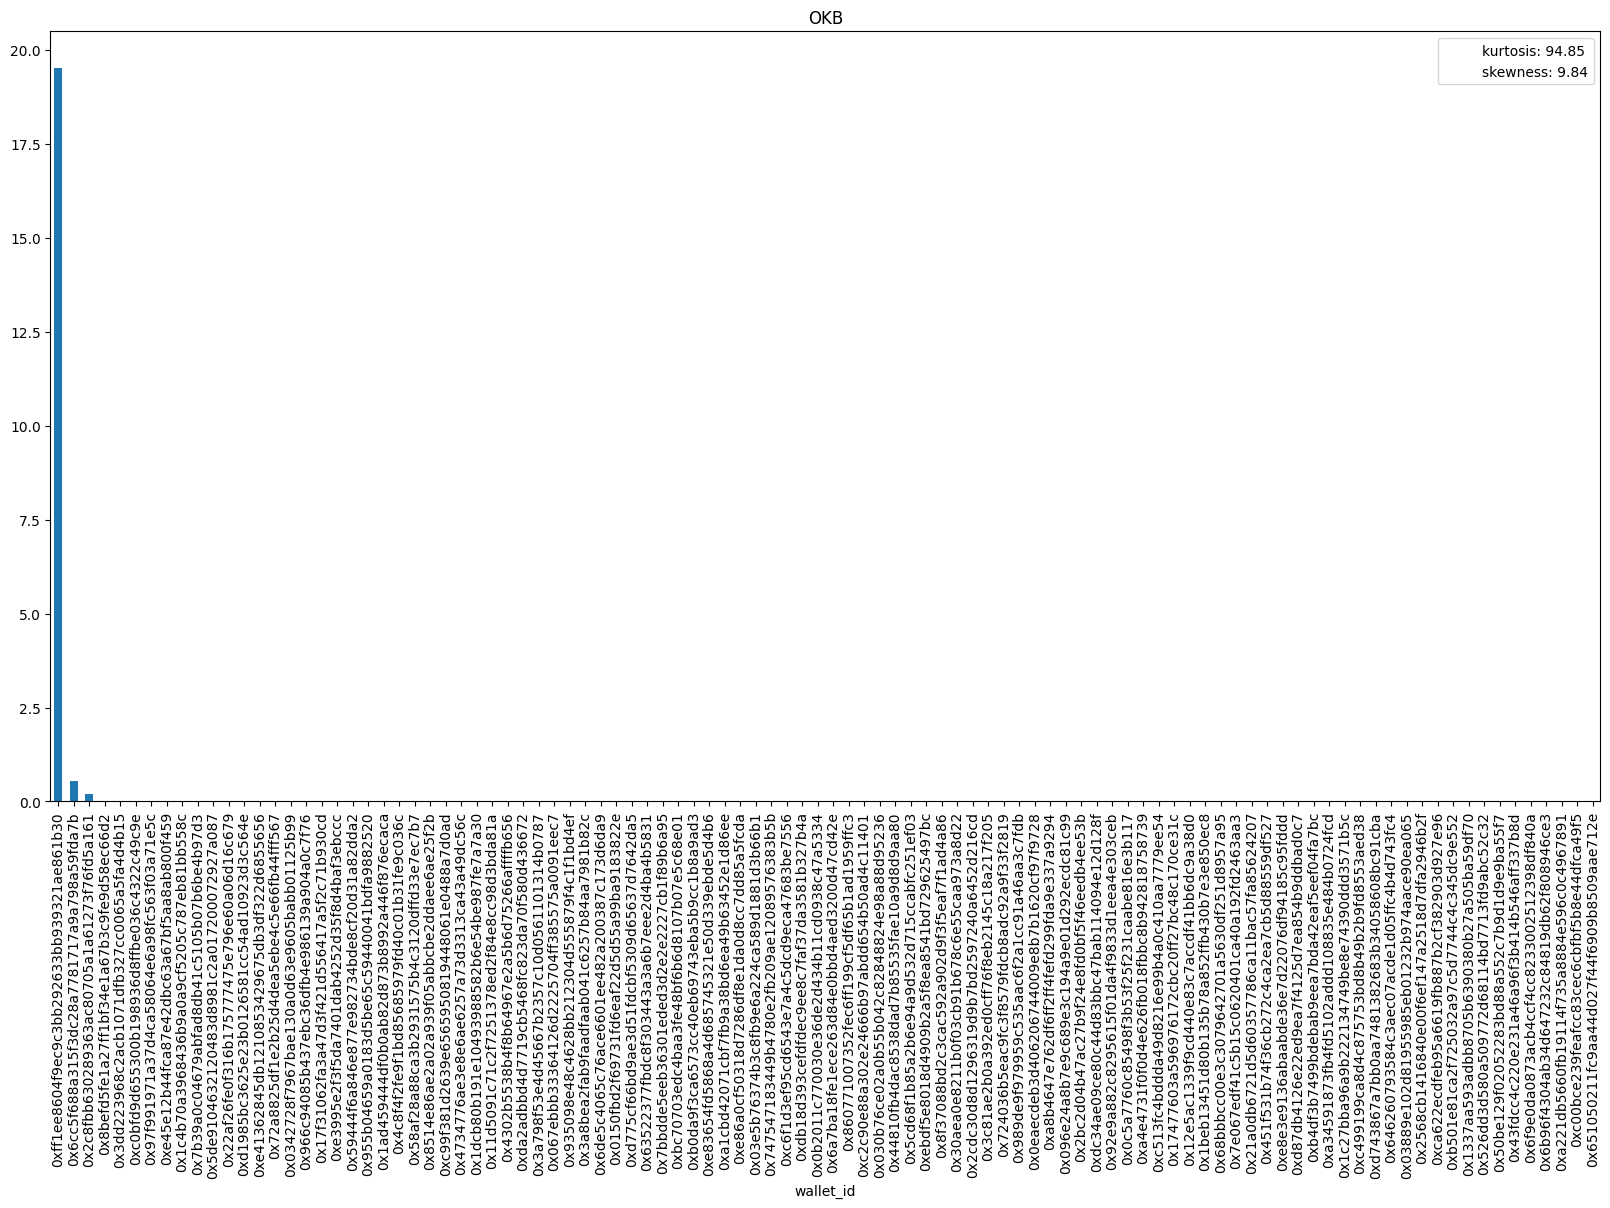

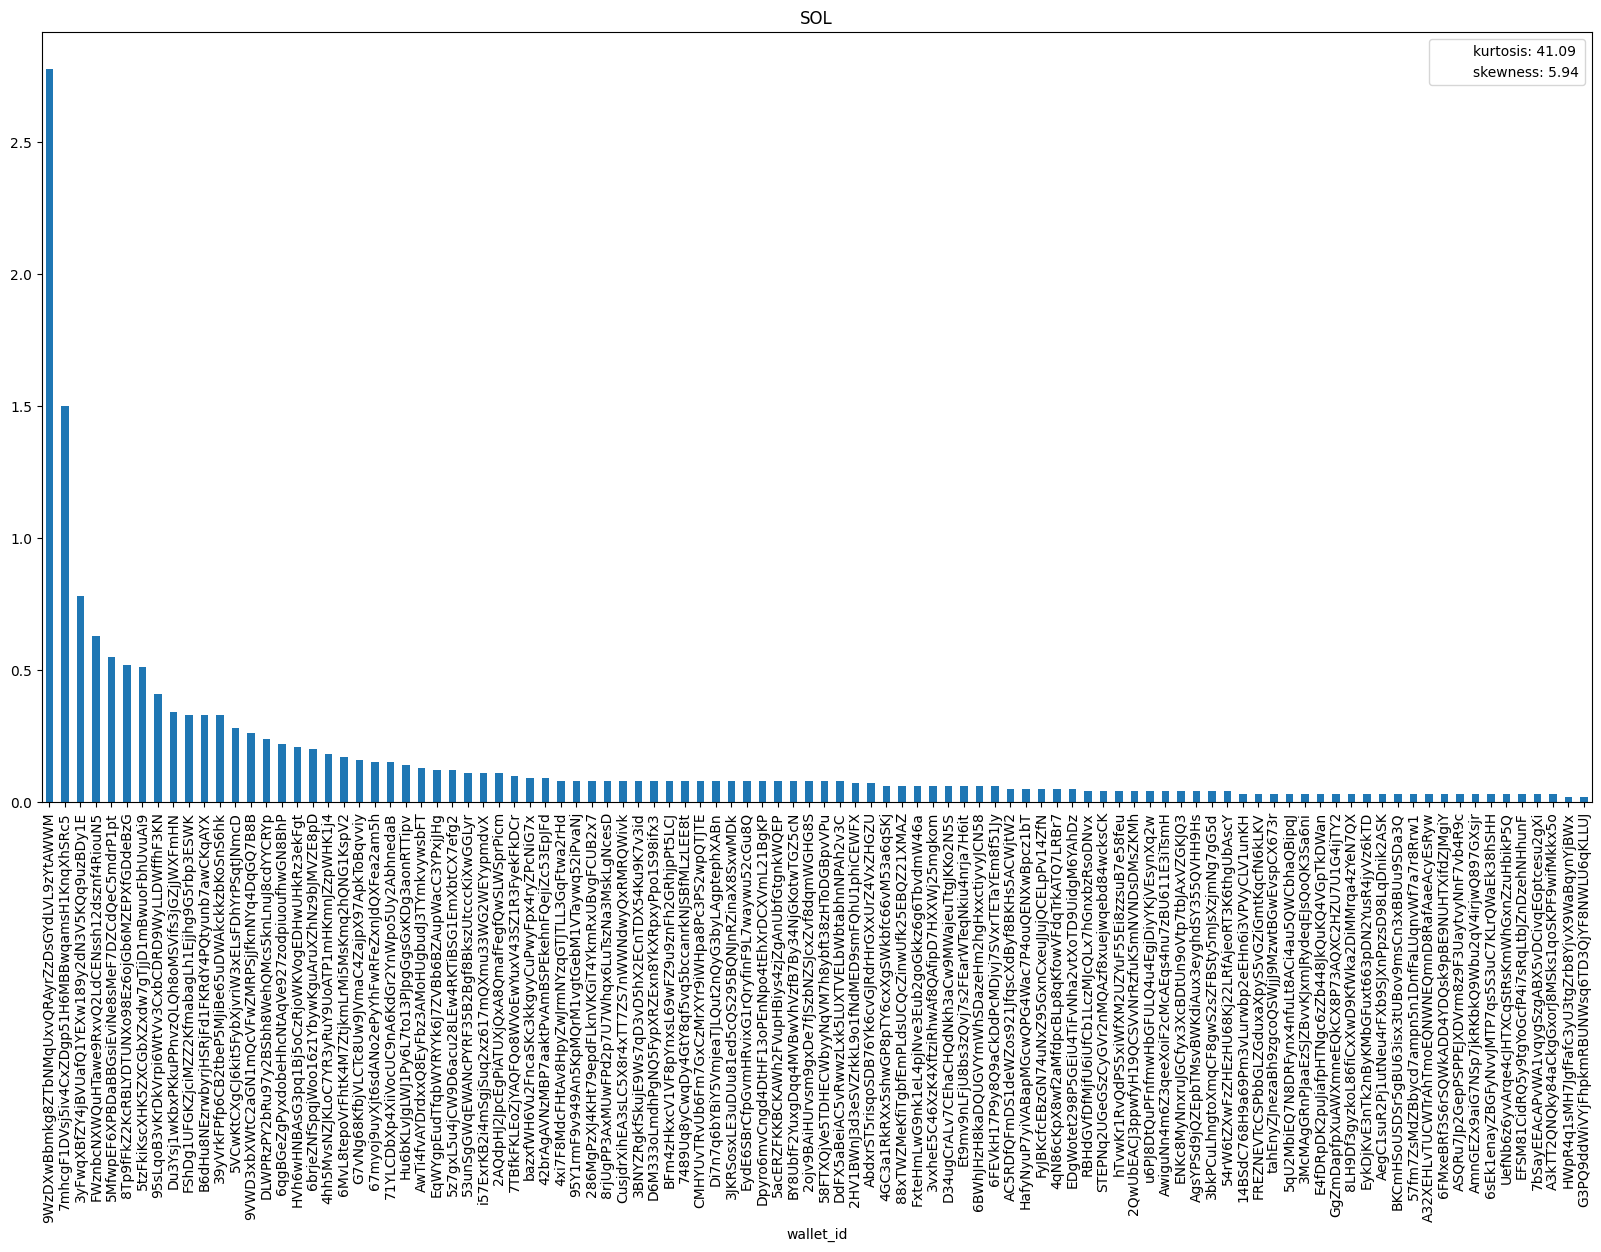

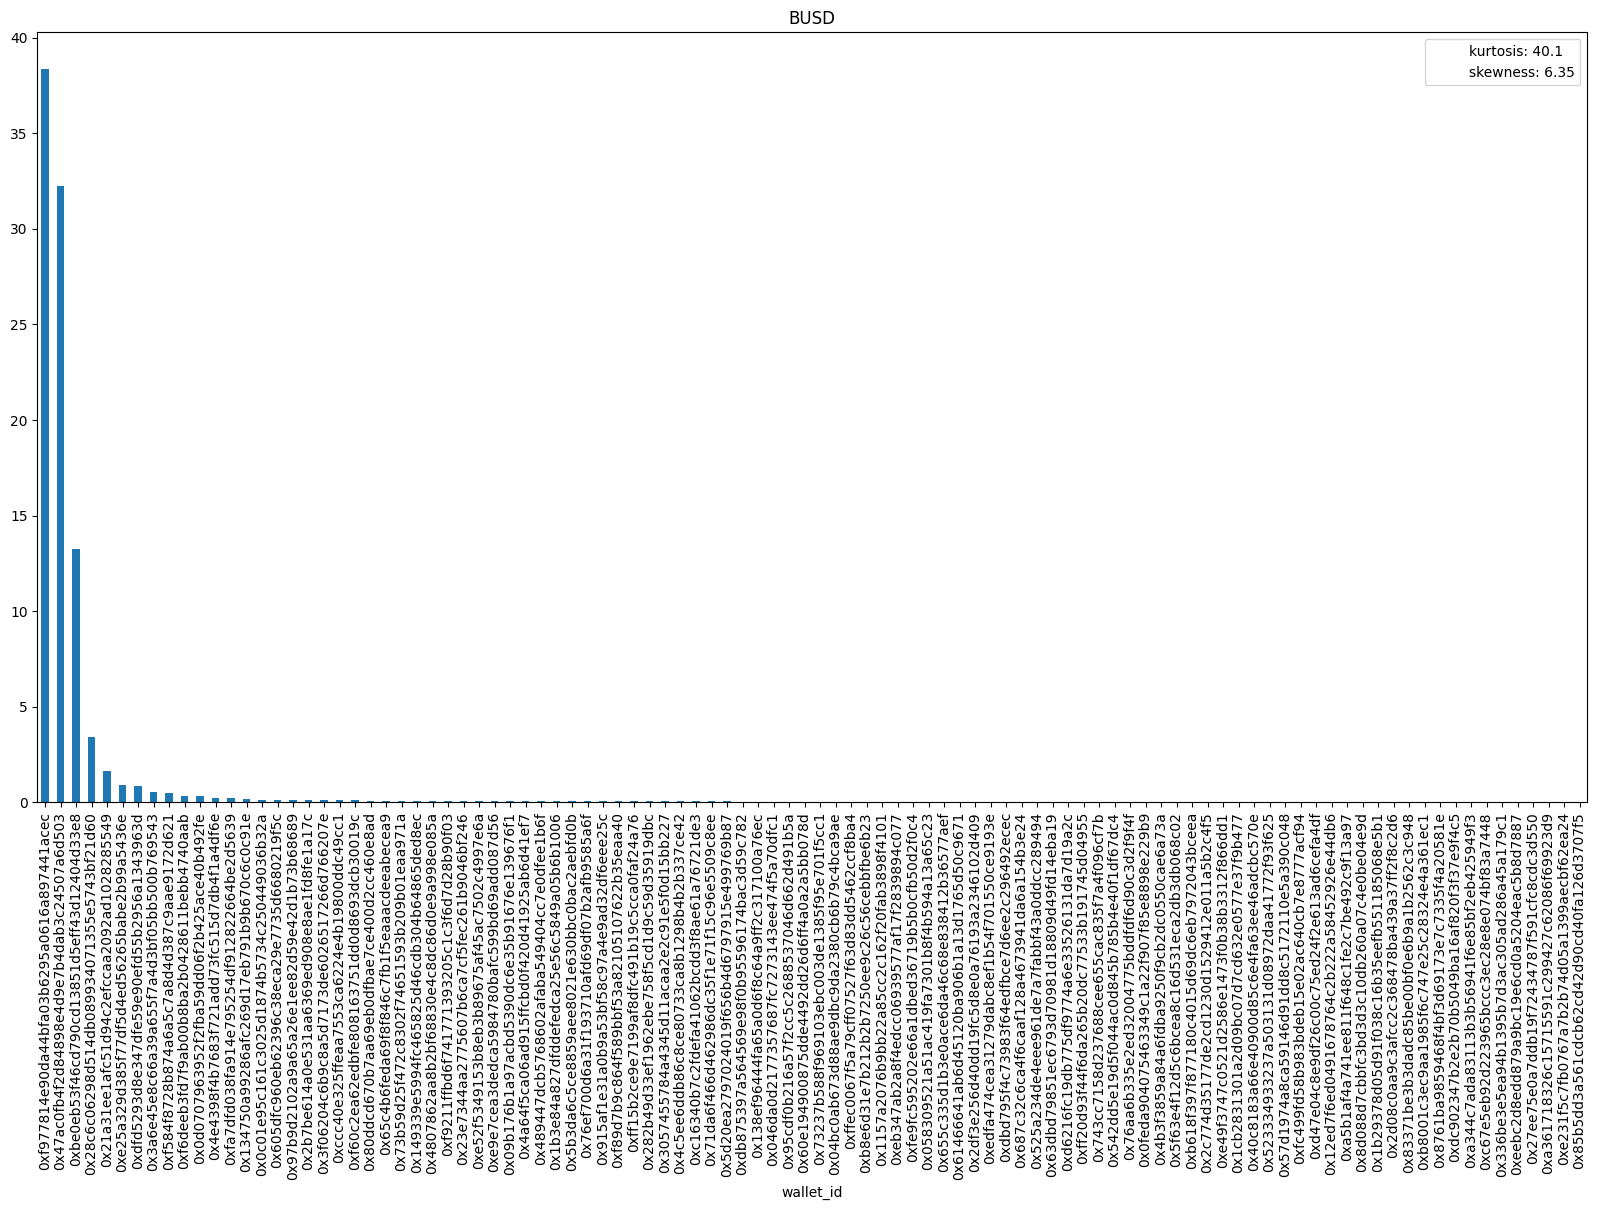

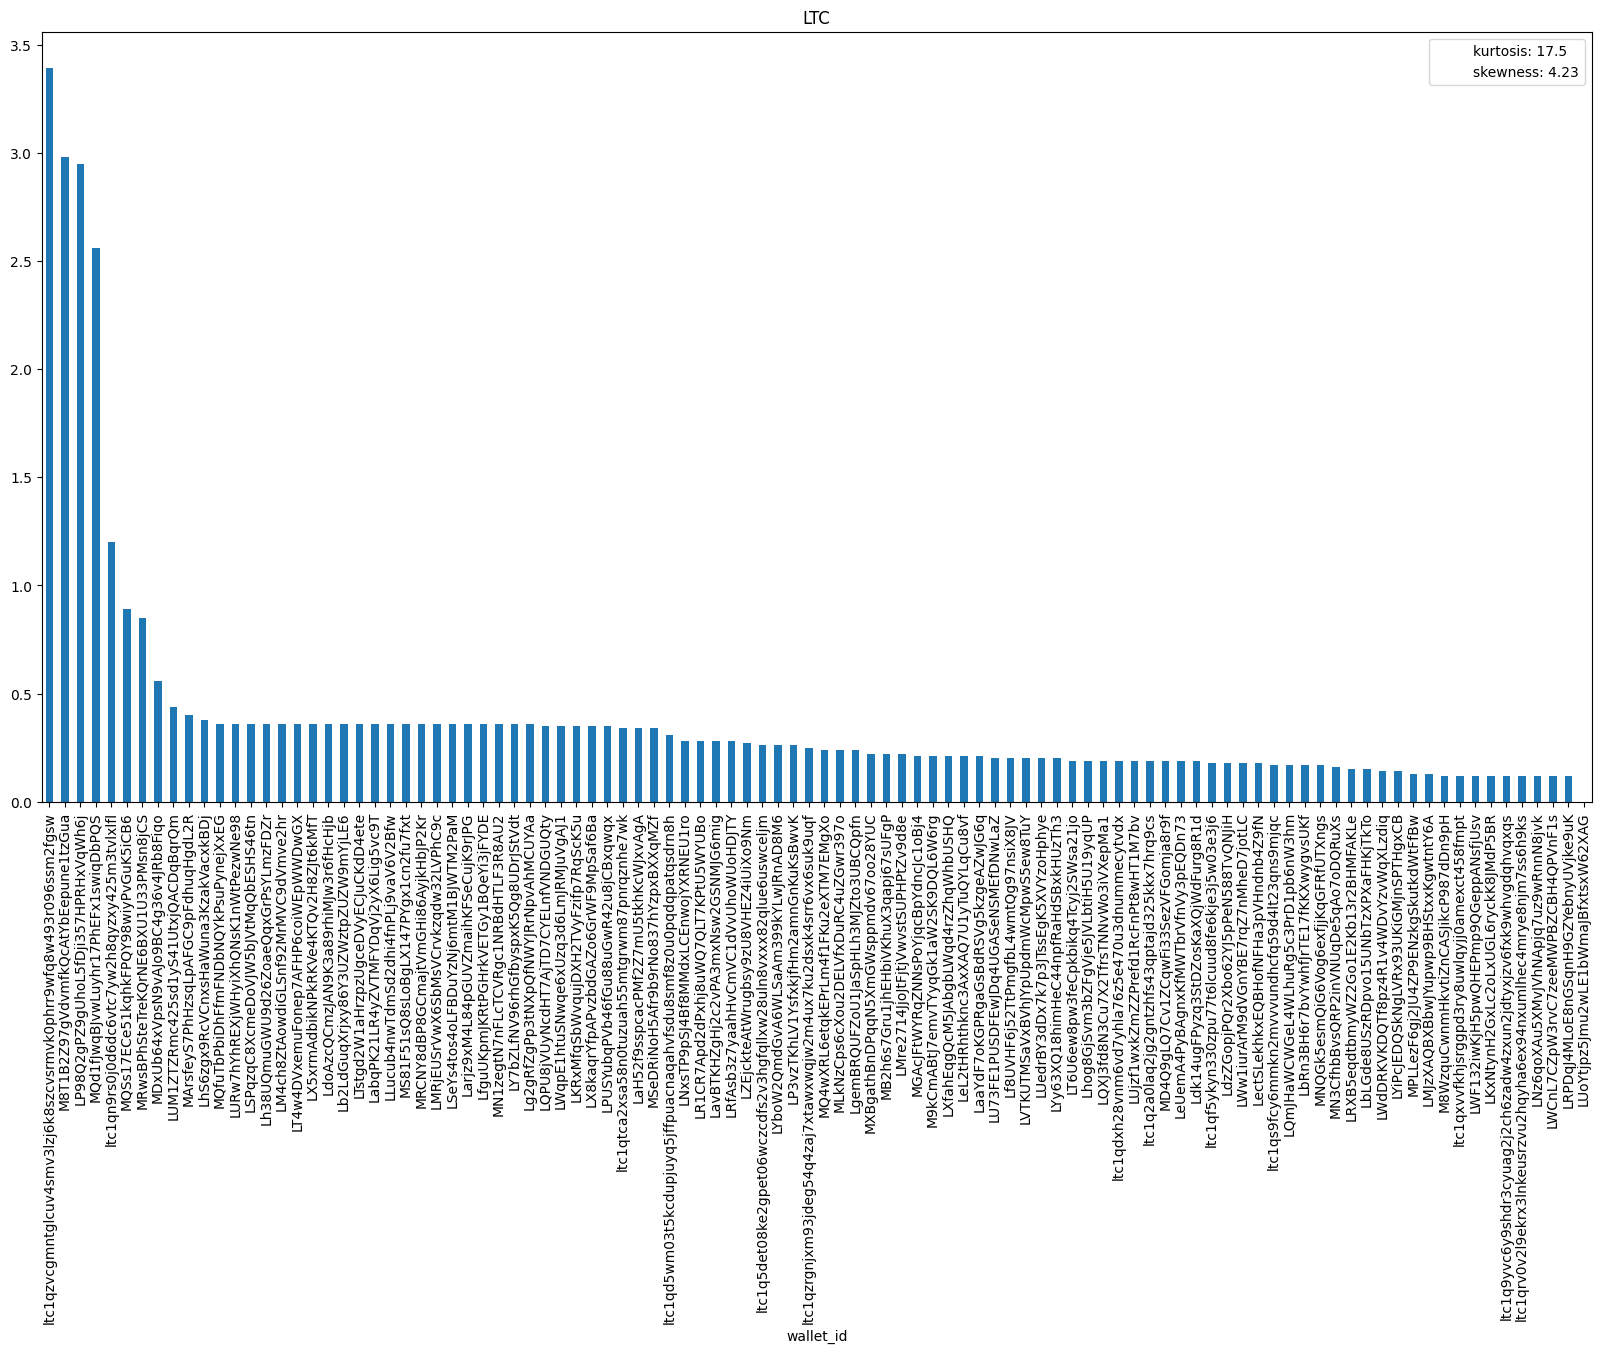

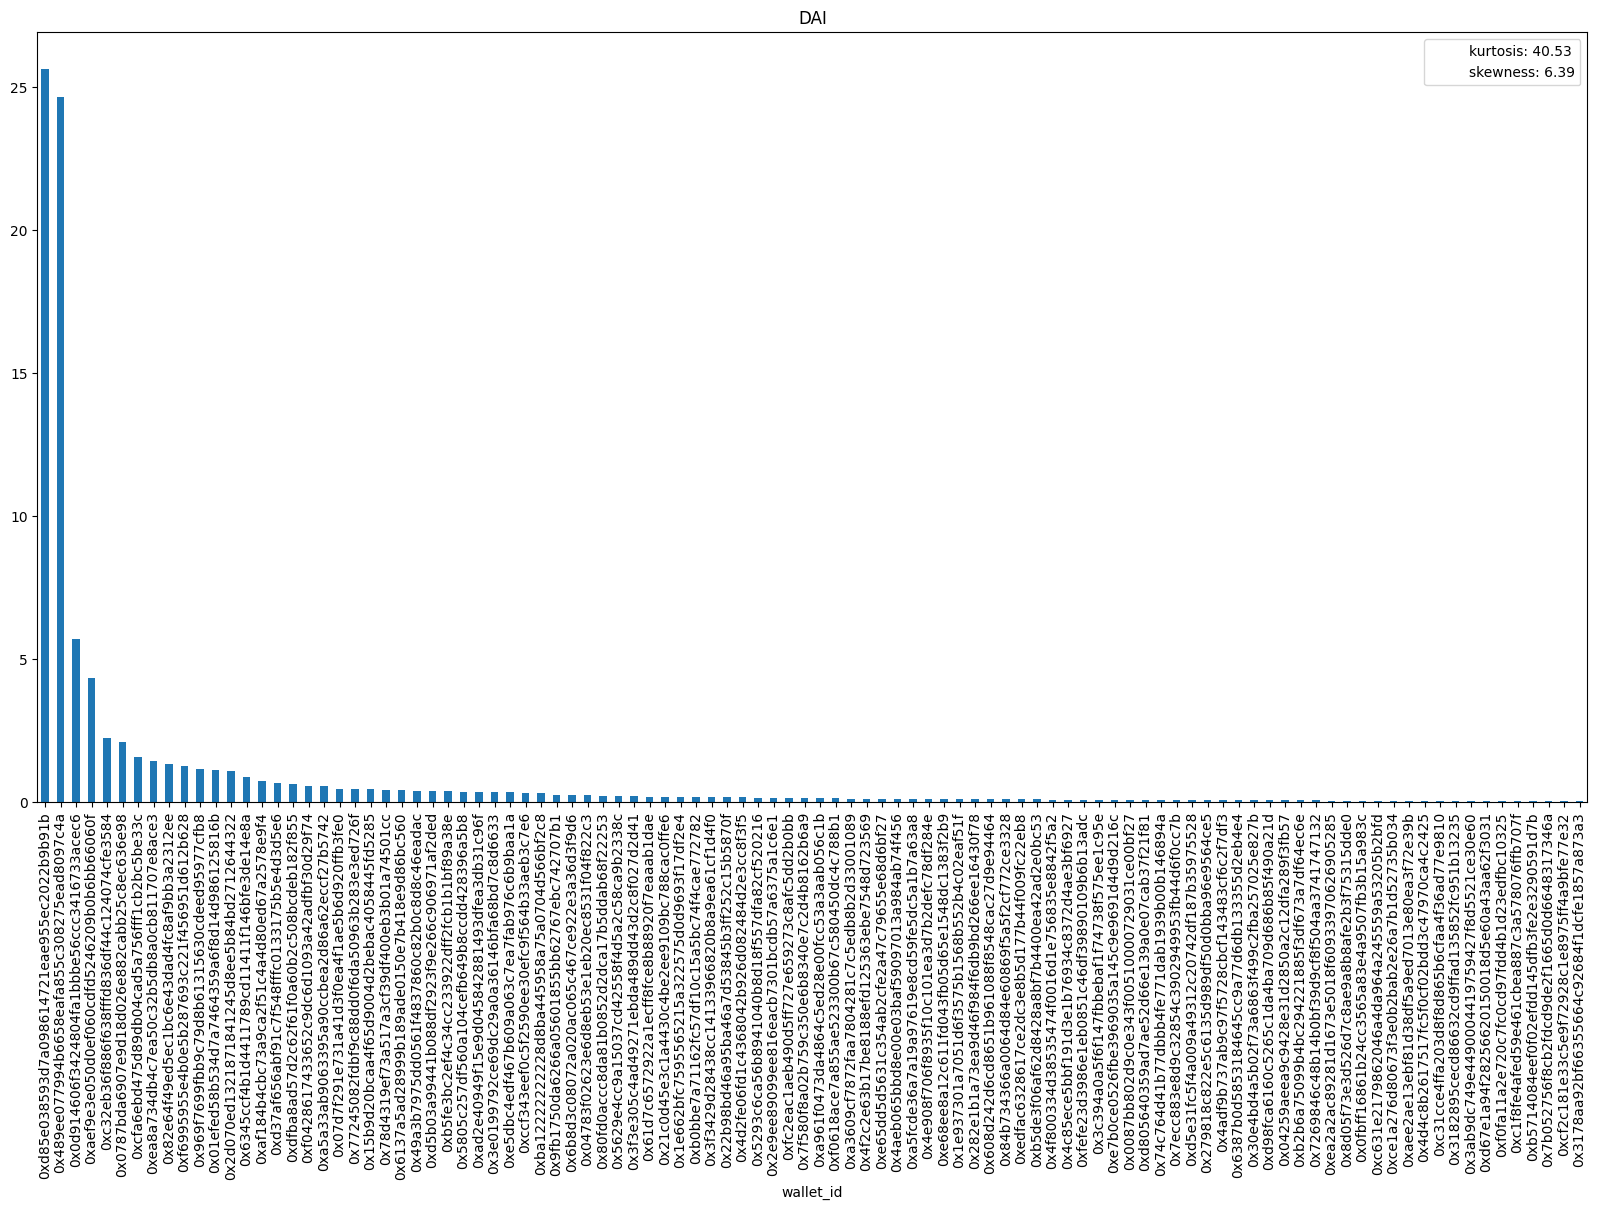

In [116]:
# for each ticker, create a barplot of the fraction of total
for ticker in df.ticker.unique():
    df[df.ticker == ticker].plot.bar(x='wallet_id', y='fraction_of_total', figsize=(20, 10))
    plt.title(ticker)
    
    # add kurtosis and skewness to the plot legend with mpachtes
    kurtosis = stats.kurtosis(df[df.ticker == ticker].fraction_of_total)
    skewness = stats.skew(df[df.ticker == ticker].fraction_of_total)
    plt.legend(handles=[mpatches.Patch(color='white', label='kurtosis: ' + str(round(kurtosis, 2))), mpatches.Patch(color='white', label='skewness: ' + str(round(skewness, 2)))])
    
    plt.show()

In [97]:
df.columns

Index(['rank', 'ticker', 'wallet_id', 'currency_quantity (cryptocurrency)',
       'fraction_of_total (%)', 'seven_day_change (cryptocurrency)'],
      dtype='object')

In [98]:
# skewness and kurtosis of the fraction of total for each ticker
stat = []
for ticker in df.ticker.unique():
    kurtosis = stats.kurtosis(df[df.ticker == ticker]['fraction_of_total (%)'])
    skewness = stats.skew(df[df.ticker == ticker]['fraction_of_total (%)'])

    # get the rank associated for each ticker
    rank = df[df.ticker == ticker].iloc[0]['rank']
    

    stat.append([rank, ticker, kurtosis, skewness])

stat_df = pd.DataFrame(stat, columns=['rank', 'ticker', 'kurtosis', 'skewness'])

In [99]:
# kurtosis descending
stat_df.sort_values(by='kurtosis', ascending=False)

rank ticker   kurtosis  skewness
9     10    OKB  94.846080  9.836957
1      2    ETH  82.516341  8.952011
7      8  MATIC  78.171802  8.651133
8      9   DOGE  74.045438  8.338583
4      5   USDC  61.735922  7.421681
6      7    ADA  43.901237  6.694679
10    12    SOL  41.085501  5.941061
13    15    DAI  40.529078  6.390814
11    13   BUSD  40.102297  6.351780
2      3   USDT  30.485928  5.342724
12    14    LTC  17.501455  4.233326
0      1    BTC  16.980896  3.768299
3      4    BNB  16.022677  3.969179
5      6    XRP   9.222170  2.766126

In [100]:
# skewness descending
stat_df.sort_values(by='skewness', ascending=False)

rank ticker   kurtosis  skewness
9     10    OKB  94.846080  9.836957
1      2    ETH  82.516341  8.952011
7      8  MATIC  78.171802  8.651133
8      9   DOGE  74.045438  8.338583
4      5   USDC  61.735922  7.421681
6      7    ADA  43.901237  6.694679
13    15    DAI  40.529078  6.390814
11    13   BUSD  40.102297  6.351780
10    12    SOL  41.085501  5.941061
2      3   USDT  30.485928  5.342724
12    14    LTC  17.501455  4.233326
3      4    BNB  16.022677  3.969179
0      1    BTC  16.980896  3.768299
5      6    XRP   9.222170  2.766126

In [129]:
stat_df.to_csv('stat_table.csv', index=False)